In [3]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
newsgroups = fetch_20newsgroups(subset="all", shuffle=True, random_state=42)

In [7]:
nltk.download("stopwords")
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [11]:
newsgroups_data = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})
newsgroups_data['text'] = newsgroups_data['text'].apply(preprocess_text)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    newsgroups_data['text'],
    newsgroups_data['target'],
    test_size=0.2,
    random_state=42)

In [19]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [23]:
scaler = MaxAbsScaler()
X_train = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [25]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
y_pred = model.predict(X_test_vec)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

Accuracy: 0.8562334217506631
                          precision    recall  f1-score   support

             alt.atheism       0.82      0.83      0.83       151
           comp.graphics       0.69      0.78      0.73       202
 comp.os.ms-windows.misc       0.79      0.79      0.79       195
comp.sys.ibm.pc.hardware       0.66      0.68      0.67       183
   comp.sys.mac.hardware       0.88      0.82      0.85       205
          comp.windows.x       0.83      0.79      0.81       215
            misc.forsale       0.82      0.77      0.79       193
               rec.autos       0.88      0.87      0.87       196
         rec.motorcycles       0.96      0.93      0.95       168
      rec.sport.baseball       0.93      0.94      0.93       211
        rec.sport.hockey       0.95      0.96      0.96       198
               sci.crypt       0.96      0.95      0.96       201
         sci.electronics       0.78      0.82      0.80       202
                 sci.med       0.92      0.92 

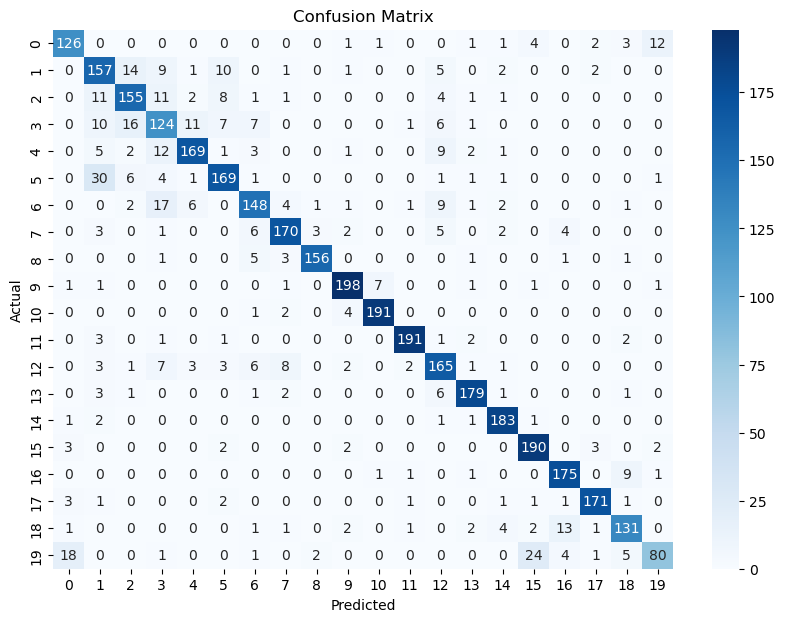

In [33]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [35]:
def predict_new_text(model, vectorizer, text):
    text_processed = preprocess_text(text)
    text_vectorized = vectorizer.transform([text_processed])
    prediction = model.predict(text_vectorized)
    category_name = newsgroups.target_names[prediction[0]]
    return category_name

In [37]:
test_texts = [
    "NASA discovers new exoplanet in the habitable zone.",
    "The car race yesterday was amazing.",
    "Python is a versatile programming language for data science.",
    "Pope Francis is the Pope and head of the Catholic Church.",
]

In [39]:
for text in test_texts:
    predicted_category = predict_new_text(model, vectorizer, text)
    print(f'Test Text: "{text}"\nPredicted Category: "{predicted_category}"\n')

Test Text: "NASA discovers new exoplanet in the habitable zone."
Predicted Category: "sci.space"

Test Text: "The car race yesterday was amazing."
Predicted Category: "rec.autos"

Test Text: "Python is a versatile programming language for data science."
Predicted Category: "comp.windows.x"

Test Text: "Pope Francis is the Pope and head of the Catholic Church."
Predicted Category: "soc.religion.christian"

